In [2]:
!pip install faker

In [3]:
import pandas as pd
import numpy as np
from faker import Faker
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
fake = Faker()

Faker.seed(14)
np.random.seed(45)

num_rows = 100000

start_date = '2015-01-01'
end_date = '2024-01-01'
d1 = pd.to_datetime(start_date, format='%Y-%m-%d')
d2 = pd.to_datetime(end_date, format='%Y-%m-%d')

df = pd.DataFrame({
    'patient_id': [fake.uuid4() for _ in range(num_rows)],
    'name': [fake.name() for _ in range(num_rows)],
    'age': np.random.randint(18, 90, num_rows),
    'gender': [fake.random_element(elements=('Male', 'Female')) for _ in range(num_rows)],
    'admission_date': [fake.date_between(start_date=d1, end_date=d2) for _ in range(num_rows)],
    'diagnosis': [fake.random_element(elements=('Hypertension', 'Anxiety', 'Depression', 'ADHD', 'Bipolar', 'Schizophrenia', 'PTSD','Obsessive-Compulsive Disorder')) for _ in range(num_rows)],
    'discharge_status': [fake.random_element(elements=('Recovered','Referred','Deceased','Discharged')) for _ in range(num_rows)]
})

df.to_csv('patient_admissions.csv', index=False)

print(df.head())

                             patient_id            name  age  gender  \
0  c15521b1-b3dc-450a-9daa-37e51b591d75   Jordan Chaney   48    Male   
1  3f372617-f0ba-4f3a-86f0-ce2ea6ec39c1    Sarah Hurley   21    Male   
2  4a800646-417a-4105-bc31-99944567ceb1  Benjamin Bauer   50  Female   
3  732242fd-a890-4e32-9297-9bfcbbeb508f    Jacob Thomas   79    Male   
4  df7142dc-af29-46f8-b774-4cca4d909eb2     Jamie Barry   53    Male   

  admission_date     diagnosis discharge_status  
0     2020-05-22  Hypertension        Recovered  
1     2015-01-29    Depression         Referred  
2     2017-11-05          PTSD       Discharged  
3     2023-01-29  Hypertension       Discharged  
4     2019-01-20  Hypertension        Recovered  


In [5]:
df.columns

Index(['patient_id', 'name', 'age', 'gender', 'admission_date', 'diagnosis',
       'discharge_status'],
      dtype='object')

Data Exploration and Cleaning

In [6]:
df.isnull().sum()

,0
patient_id,0
name,0
age,0
gender,0
admission_date,0
diagnosis,0
discharge_status,0


In [7]:
# Convert 'admission_date' to datetime
df['admission_date'] = pd.to_datetime(df['admission_date'])

In [8]:
# Distribution of categorical variables
df['gender'].value_counts()
df['diagnosis'].value_counts()
df['discharge_status'].value_counts()

,count
discharge_status,
Recovered,25078
Deceased,25066
Referred,25058
Discharged,24798


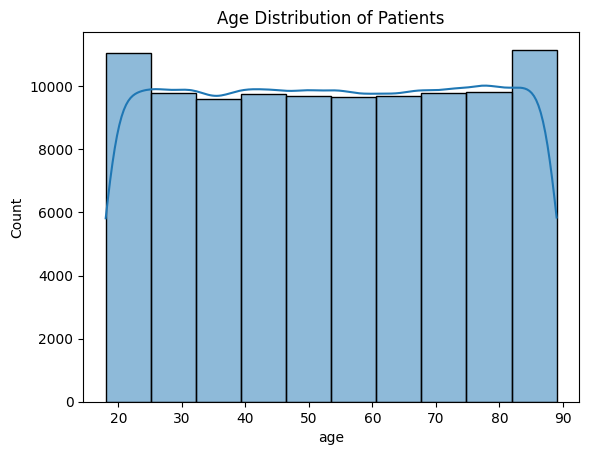

In [9]:
# Age distribution
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution of Patients')
plt.show()

The histogram reveals that there are more patients in the younger (around 20 years old) and older (around 80-90 years old) age groups compared to middle-aged groups. This might suggest that mental health-related admissions are higher in these age brackets.

In [10]:
# Gender distribution
fig = px.pie(df, names='gender', title='Gender Distribution of Patients', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textinfo='percent+label', pull=[0.1, 0])
fig.update_layout(title_font_size=20, legend_title_font_size=15)
fig.show()

#Admission Trends

In [11]:
# Time Series Analysis: Admissions over time
df['admission_year'] = df['admission_date'].dt.year
df['admission_month'] = df['admission_date'].dt.month

In [12]:
# Admissions by year
admissions_by_year = df.groupby('admission_year').size()

fig = go.Figure()
fig.add_trace(go.Scatter(x=admissions_by_year.index, y=admissions_by_year.values,
                         mode='lines+markers', marker=dict(size=10, color='red'),
                         line=dict(color='blue', width=3),
                         name='Yearly Admissions'))

fig.update_layout(title='Yearly Patient Admissions', xaxis_title='Year', yaxis_title='Number of Admissions',
                  title_font_size=20, xaxis_title_font_size=15, yaxis_title_font_size=15)
fig.show()

* The number of admissions fluctuates over the years. There was a notable increase from 2016 to 2018, followed by a decline in 2019 and a significant drop in 2020. This trend could reflect external factors such as changes in healthcare policies, public awareness, or possibly the impact of the COVID-19 pandemic.
* The graph shows a sharp decline in patient admissions starting from 2019 and continuing through 2023, indicating that fewer patients have been admitted for mental health conditions in recent years.

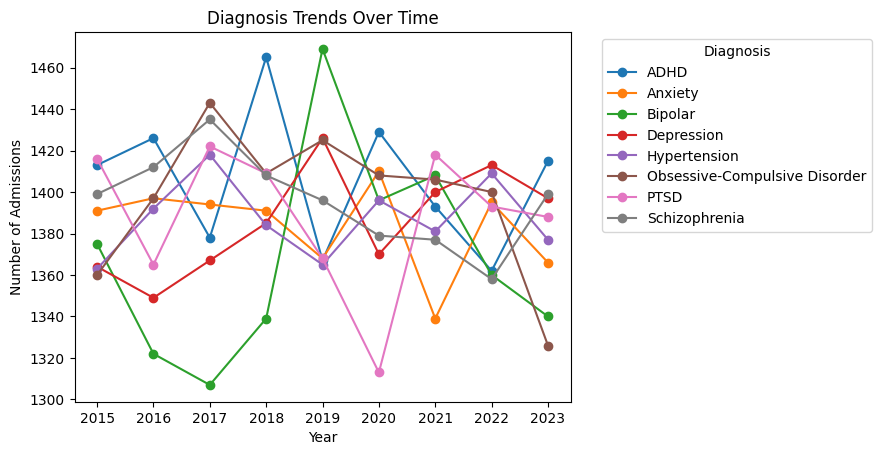

In [13]:
# Diagnosis breakdown over time
diagnosis_trend = df.groupby(['admission_year', 'diagnosis']).size().unstack()
diagnosis_trend.plot(kind='line', marker='o')
plt.title('Diagnosis Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-14-3801e047d4d0>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




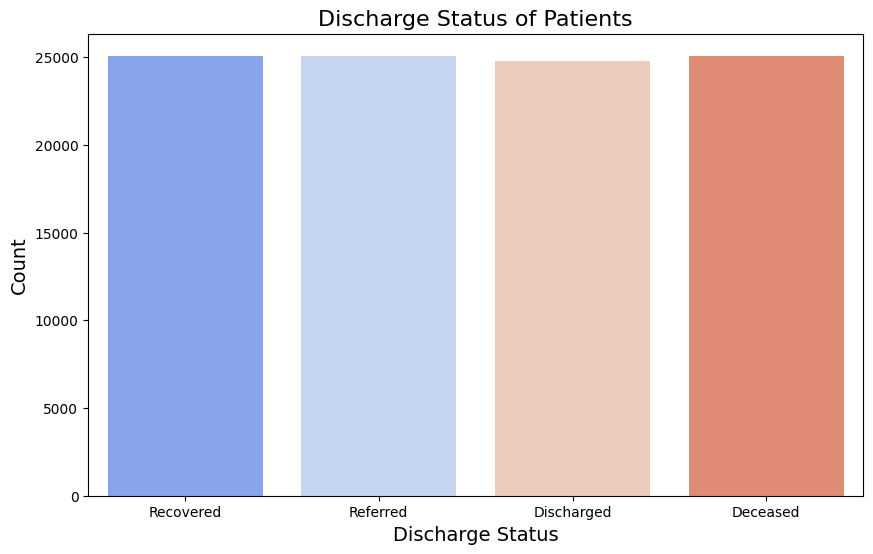

In [14]:
# Discharge status breakdown
plt.figure(figsize=(10, 6))
sns.countplot(x='discharge_status', data=df, palette='coolwarm', saturation=0.8)
plt.title('Discharge Status of Patients', fontsize=16)
plt.xlabel('Discharge Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Correlation analysis

<ipython-input-15-e1082e38d18e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




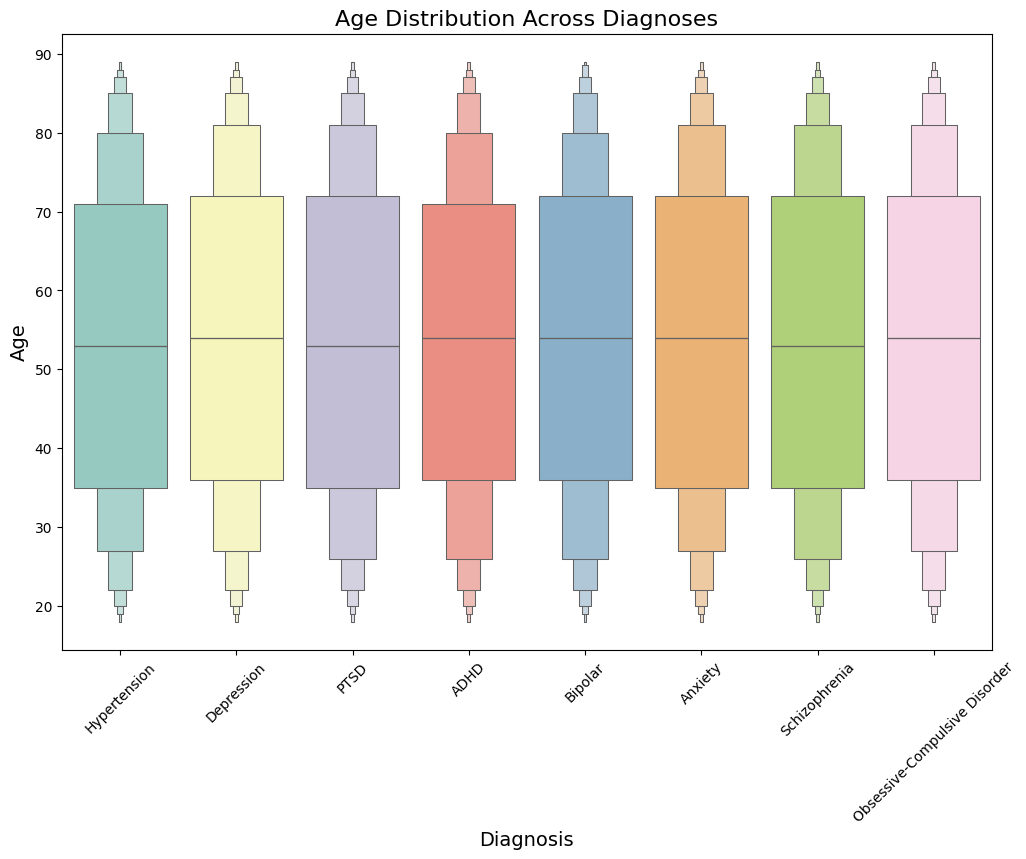

In [15]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x='diagnosis', y='age', data=df, palette='Set3')
plt.title('Age Distribution Across Diagnoses', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

* From the graph, it is evident that the majority of diagnoses fall within the age ranges of 30 to 60, with a significant peak in the 40-50 range. This suggests that a considerable number of diagnoses occur during middle adulthood.
* Conversely, diagnoses seem to decrease in frequency as age increases beyond 60 and are minimal for individuals under 30, indicating a lower incidence of diagnoses in these age groups.
* Understanding the age distribution across diagnoses can aid in tailoring healthcare strategies to specific age groups and addressing the unique health challenges they face

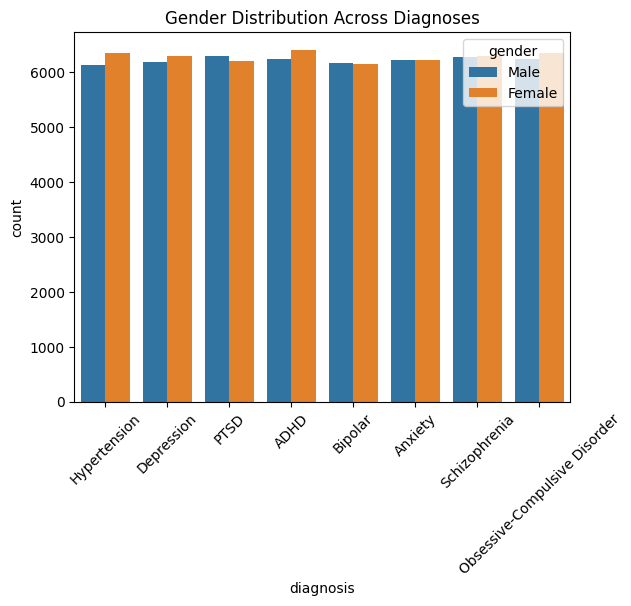

In [16]:
sns.countplot(x='diagnosis', hue='gender', data=df)
plt.title('Gender Distribution Across Diagnoses')
plt.xticks(rotation=45)
plt.show()

In [17]:
fig = px.pie(df, names='diagnosis', hole=0.4, title='Diagnosis Distribution',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textinfo='percent+label', pull=[0.05 for _ in df['diagnosis'].unique()])
fig.update_layout(title_font_size=20, legend_title_font_size=15)
fig.show()